# **Problem Statement**

1. Do the following for the given dataset: 
 * Visualize the dataset using a plot (Library: Seaborn and Matplotlib) and create a decision Tree Algorithm to its complete depth (visualize the tree after construction). Calculate the following evaluation metrics: Accuracy, Precision, Recall, F1 Score, Confusion Matrix, and discuss what you observe.
 * Create a Decision Tree Algorithm with hyperparameter tuning (visualize the tree after construction). Calculate the following evaluation metrics: Accuracy, Precision, Recall, F1 Score, Confusion Matrix, and discuss what you observe.

2. Do the following for the given dataset: 
  * Apply k-Nearest Neighbour algorithm on the given dataset (Find the best value for “k” using the method explained in class). Calculate the following evaluation metrics: Accuracy, Precision, Recall, F1 Score, Confusion Matrix, and discuss what you observe. 
  * Apply Min-Max Normalization on the given dataset and visualize it using a plot. Then, repeat Section “2.a” fully on the Normalized dataset. 
  * Plot ROC curves and calculate the corresponding AUC values for Section “2.a” and “2.b” and discuss what you observe.

Dataset can be found at https://gist.github.com/ankit-rawani/dd81e4627ce30e3a5b98bae59898d753

## **Importing necessary modules**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen

# **Importing datasets**

In [ ]:
features_url = "https://gist.githubusercontent.com/ankit-rawani/dd81e4627ce30e3a5b98bae59898d753/raw/176829974d81ed90ee3cfaf94cf9d78d28b21802/features.csv"
target_url = "https://gist.githubusercontent.com/ankit-rawani/dd81e4627ce30e3a5b98bae59898d753/raw/e189dccd101f4421cad68ca64fe5e46e94c45ae5/target.csv"
normalize_features = pd.read_csv(urlopen(Request(features_url)), low_memory=False)
features = pd.read_csv(urlopen(Request(features_url)), low_memory=False)
target = pd.read_csv(urlopen(Request(target_url)), low_memory=False)

In [ ]:
features.head()

,height,weight
0,1.417837e+06,130.331364
1,1.170866e+06,114.834354
2,1.326528e+06,52.048800
3,1.436353e+06,56.271637
4,1.667446e+06,112.761949


# **Splitting dataset**

In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# **Data visualization**

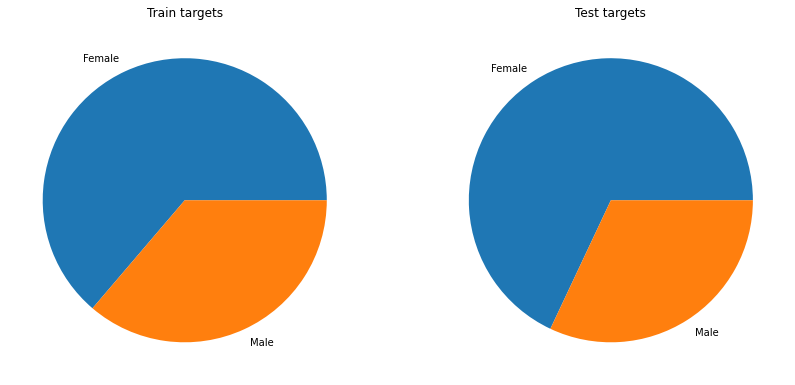

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(list(dict(target_train.target.value_counts()).values()), labels=list(dict(target_train.target.value_counts()).keys()))
axs[1].pie(list(dict(target_test.target.value_counts()).values()), labels=list(dict(target_test.target.value_counts()).keys()))

axs[0].set_title('Train targets')
axs[1].set_title('Test targets')

plt.show()

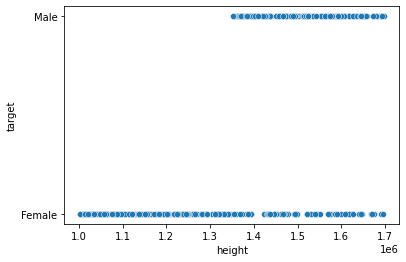

In [ ]:
sns.scatterplot(x=feature_train['height'], y=target_train['target'])

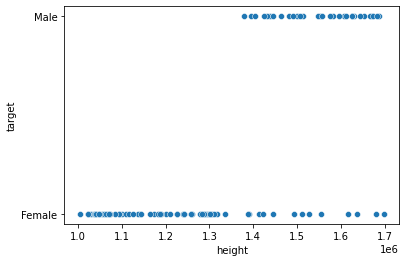

In [ ]:
sns.scatterplot(x=feature_test['height'], y=target_test['target'])

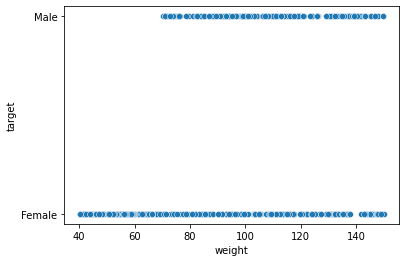

In [ ]:
sns.scatterplot(x=feature_train['weight'], y=target_train['target'])

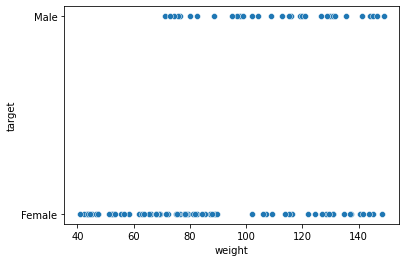

In [ ]:
sns.scatterplot(x=feature_test['weight'], y=target_test['target'])

# **Decision tree**

## **Create decision tree**

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
fitted_model = model.fit(feature_train, target_train)

## **Predictions**

In [ ]:
predictions = fitted_model.predict(feature_test)

In [ ]:
accuracy_score(target_test, predictions)

1.0

In [ ]:
confusion_matrix(target_test, predictions)

array([[68,  0],
       [ 0, 32]])

In [ ]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00        68
        Male       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



So, we have a 100% accurate model, with the precision, recal and f1-score, all being 1.0

This shows that the model is overfitted. Also, the dataset is too small and the train and test data is almost similar.

## **Visualization of decision tree**

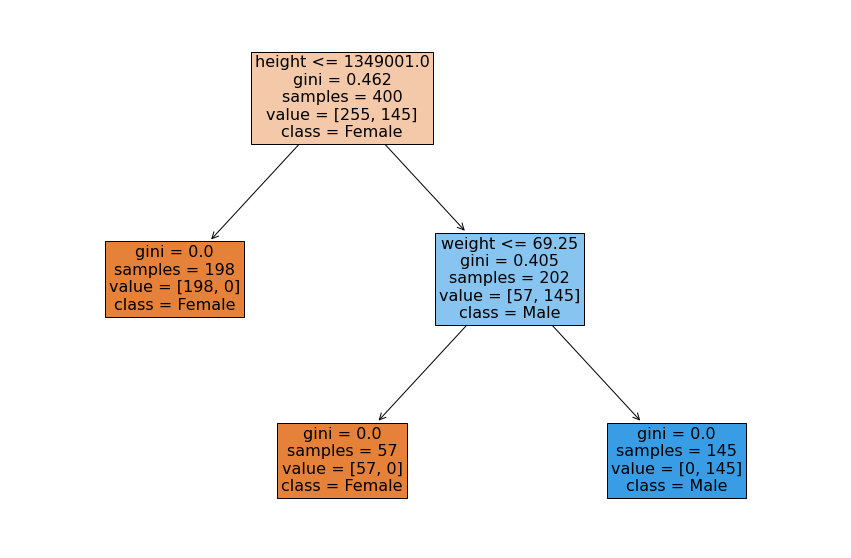

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = plot_tree(model, feature_names=['height', 'weight'], class_names=['Female', 'Male'], filled=True, fontsize=16)

# HyperParameter Tuning
 Here we set a range of values for the function ```GridSearchCV``` to iterate through


In [ ]:
tune_params={"criterion":['gini','entropy'],
            "max_depth":range(1,10),
            "min_samples_split":range(2,10),
            "min_samples_leaf":range(2,10),
            "max_leaf_nodes":range(2,5),
             "splitter":['best', 'random']}
grid=GridSearchCV(model,param_grid=tune_params,cv=5,verbose=1)
grid.fit(feature_train,target_train)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 34560 out of 34560 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

## This displays the Best parameters

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## **Predicions**

In [ ]:
new_model=grid.best_estimator_
predictions = new_model.predict(feature_test)

In [ ]:
accuracy_score(target_test, predictions)

1.0

In [ ]:
confusion_matrix(target_test, predictions)

array([[68,  0],
       [ 0, 32]])

In [ ]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00        68
        Male       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## **Visualization of decision tree**

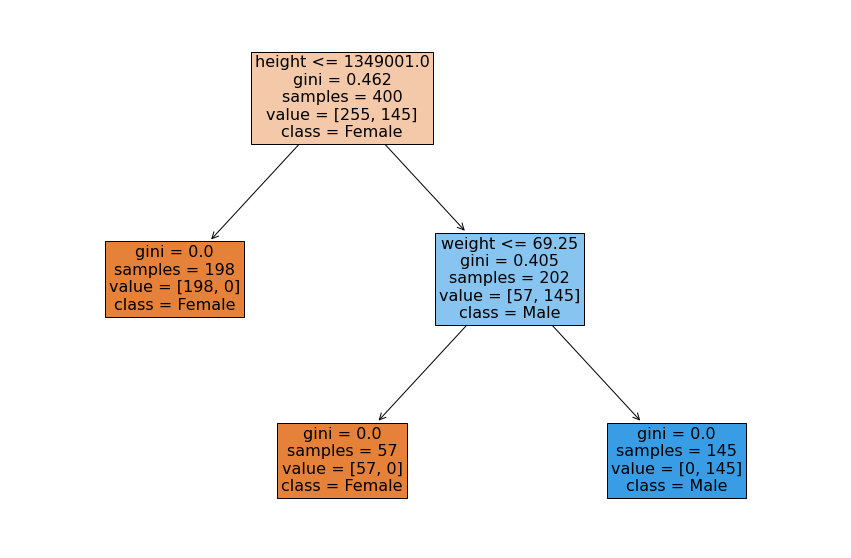

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = plot_tree(new_model, feature_names=['height', 'weight'], class_names=['Female', 'Male'], filled=True, fontsize=16)

The Descion tree is same as that obtained without hyper parameter Tuning.<br>
Hyper parameter Tuning in this case does not improve the model possibly due to:
* Small size of data
* Small number of features

# K-nearest neighbour

We apply KNN algorithm on the dataset

In [ ]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(feature_train, target_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Predict the target

In [ ]:
pred= knn.predict(feature_test)

## **Evaluate the prediction**

In [ ]:
print(confusion_matrix(target_test,pred))

[[58 10]
 [15 17]]


In [ ]:
print(classification_report(target_test,pred))

              precision    recall  f1-score   support

      Female       0.79      0.85      0.82        68
        Male       0.63      0.53      0.58        32

    accuracy                           0.75       100
   macro avg       0.71      0.69      0.70       100
weighted avg       0.74      0.75      0.74       100



We notice that the precision and recall values are far lesser than 1.
So, we need to select a better value for K.

## **Choosing a better K value**

So, we try to calculate the accuracy for k values between 1 to 40, by running a for loop.

In [ ]:
accuracy_rate=[]

for i in range(1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  score= cross_val_score(knn,features, target.values.ravel(),cv=10)
  accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

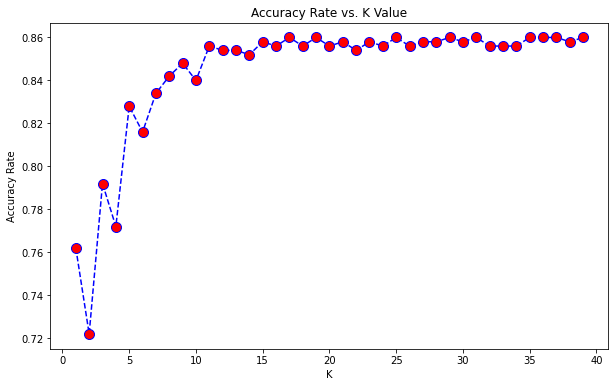

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

We notice that accuracy is higher around K value 25.
So we take k=25 and find accuracy.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(feature_train, target_train.values.ravel())
pred = knn.predict(feature_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(target_test,pred))


WITH K=25


[[55 13]
 [ 0 32]]


In [ ]:
print('WITH K=25')
print('\n')
print(classification_report(target_test,pred))

WITH K=25


              precision    recall  f1-score   support

      Female       1.00      0.81      0.89        68
        Male       0.71      1.00      0.83        32

    accuracy                           0.87       100
   macro avg       0.86      0.90      0.86       100
weighted avg       0.91      0.87      0.87       100



Since the accuracy, precision and recall values are high with k=25,
**The most appropriate value of K is 25.**

# Min-Max Normalization

Normalizing the given data using Min-Max Scaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
normalize_features[['height','weight']] = min_max_scaler.fit_transform(normalize_features[['height','weight']])
normalize_features.head()

,height,weight
0,0.597487,0.821137
1,0.243114,0.680047
2,0.466469,0.108426
3,0.624055,0.146872
4,0.955646,0.661179


In [ ]:
normalize_features.isnull().sum(axis=0)

height    0
weight    0
dtype: int64

Now, we visualize the normalized data 

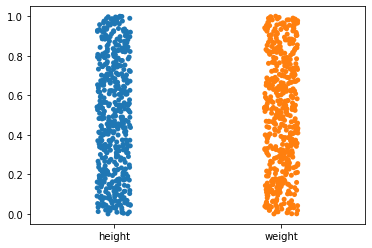

In [ ]:
sns.stripplot(data=normalize_features)

## **KNN for normalized data**

Applying KNN method for normalized data

In [ ]:
normalize_features.head()

,height,weight
0,0.597487,0.821137
1,0.243114,0.680047
2,0.466469,0.108426
3,0.624055,0.146872
4,0.955646,0.661179


In [ ]:
normalize_feature_train, normalize_feature_test, normalize_target_train, normalize_target_test = train_test_split(normalize_features, target, test_size=0.2, random_state=1)
normalized_knn= KNeighborsClassifier(n_neighbors=1)
normalized_knn.fit(normalize_feature_train, normalize_target_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
normalized_pred= normalized_knn.predict(normalize_feature_test)

In [ ]:
print(confusion_matrix(normalize_target_test,normalized_pred))

[[68  0]
 [ 0 32]]


In [ ]:
print(classification_report(normalize_target_test,normalized_pred))

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00        68
        Male       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
normalize_accuracy_rate=[]

for i in range(1,40):
  knn_i= KNeighborsClassifier(n_neighbors=i)
  score= cross_val_score(knn_i,normalize_features, target.values.ravel(),cv=10)
  normalize_accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

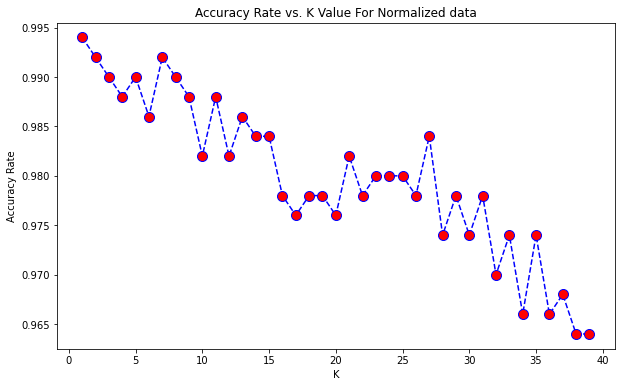

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),normalize_accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value For Normalized data')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

We notice that accuracy is higher around K value 7.
So we take k=7 and find accuracy.

In [ ]:
normalize_knn = KNeighborsClassifier(n_neighbors=25)
normalize_knn.fit(normalize_feature_train, normalize_target_train.values.ravel())
normalize_pred = normalize_knn.predict(normalize_feature_test)
print('WITH K=7')
print('\n')
print('Confusion Matrix:')
print('\n')
print(confusion_matrix(normalize_target_test,normalize_pred))
print('\n')
print('Metrics:')
print(classification_report(normalize_target_test,normalize_pred))

WITH K=7


Confusion Matrix:


[[68  0]
 [ 0 32]]


Metrics:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00        68
        Male       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



It can be observed that the accuracy, precision and recall values are 1 after normalization with k=7,
**The most appropriate value of K is 7.**

# ROC Curves and AUC values

##ROC curve for K-nearest neighbour with K=25 (without Min-Max normalization (2.a)) 

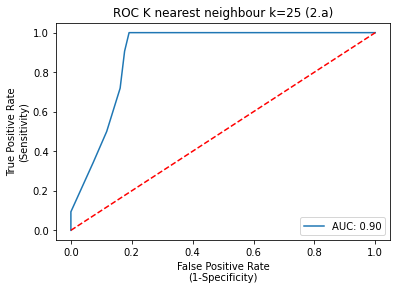

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
enc_dict={'Female': 0, 'Male': 1}                                       #encoding
enc_target_test=[enc_dict[ni] for ni in target_test.values.ravel()]     #encoding

knn_roc_auc_exp = roc_auc_score(enc_target_test,[enc_dict[ni] for ni in knn.predict(feature_test)])
fpr, tpr, thresholds = roc_curve(enc_target_test,knn.predict_proba(feature_test)[:,1])



plt.plot(fpr, tpr, label='AUC: %0.2f' % knn_roc_auc_exp)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([ -0.050, 1.05])
plt.xlabel('False Positive Rate\n(1-Specificity)')
plt.ylabel('True Positive Rate\n(Sensitivity)')
plt.title('ROC K nearest neighbour k=25 (2.a)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AUC for the plot is 0.90


##ROC curve for K-nearest neighbour with K=7 after Min-Max normalization (2.b) 

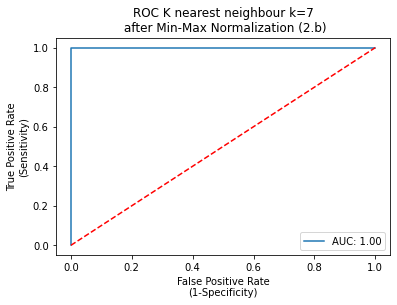

In [ ]:
enc_normalize_target_test=[enc_dict[ni] for ni in normalize_target_test.values.ravel()]          #encoding

normalize_knn_roc_auc_exp = roc_auc_score(enc_normalize_target_test,[enc_dict[ni] for ni in normalize_knn.predict(normalize_feature_test)])
fpr, tpr, thresholds = roc_curve([enc_dict[ni] for ni in normalize_target_test.values.ravel()],normalize_knn.predict_proba(normalize_feature_test)[:,1])

plt.plot(fpr, tpr, label='AUC: %0.2f' % normalize_knn_roc_auc_exp)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1-Specificity)')
plt.ylabel('True Positive Rate\n(Sensitivity)')
plt.title('ROC K nearest neighbour k=7\n after Min-Max Normalization (2.b)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AUC for the plot is 1.00

As AUC of the ROC curve of KNN after Min-Max normalization (1.00) is greater than that of without Min-Max normalization (0.90), KNN after Min-Max normalization performs better than the other.